Global Internet Usage

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import sys
import os

from collections import defaultdict, Counter

sb.set_style("darkgrid")
sb.set(font_scale = 1.2)

pd.set_option("display.max_rows", 10000)
pd.set_option("display.max_columns", 100)

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
df = pd.read_csv("D:\Open Classroom\Datasets\Global Internet Usage Dataset\gapminder_internet.csv")
df.head()

,country,incomeperperson,internetuserate,urbanrate
0,Afghanistan,NaN,3.654122,24.04
1,Albania,1914.996551,44.989947,46.72
2,Algeria,2231.993335,12.500073,65.22
3,Andorra,21943.339900,81.000000,88.92
4,Angola,1381.004268,9.999954,56.70


In [5]:
df.shape

(213, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          213 non-null    object 
 1   incomeperperson  190 non-null    float64
 2   internetuserate  192 non-null    float64
 3   urbanrate        203 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.8+ KB


In [8]:
round(df.describe(), 2)

,incomeperperson,internetuserate,urbanrate
count,190.00,192.00,203.00
mean,8740.97,35.63,56.77
std,14262.81,27.78,23.84
min,103.78,0.21,10.40
25%,748.25,10.00,36.83
50%,2553.50,31.81,57.94
75%,9379.89,56.42,74.21
max,105147.44,95.64,100.00


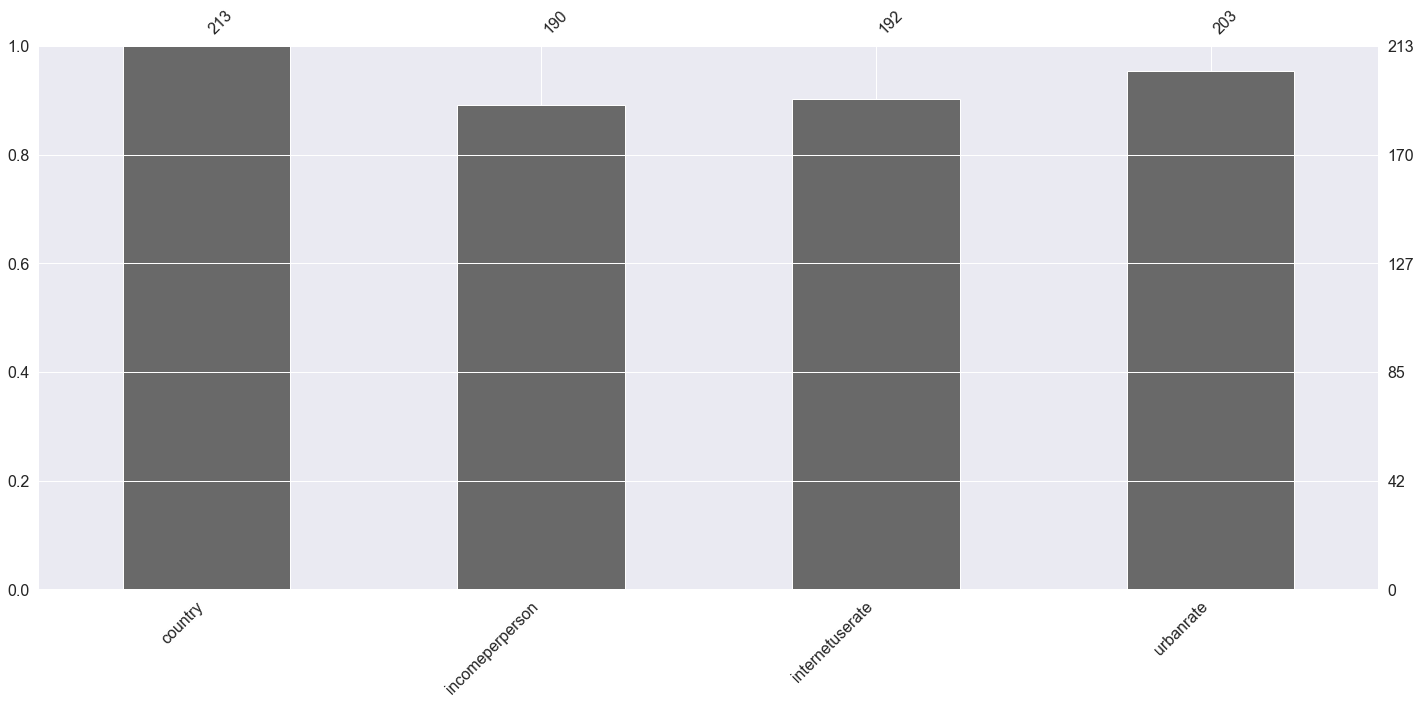

In [20]:
msno.bar(df)

In [25]:
df = round(df.replace(np.nan, 0),2)
df.head()

,country,incomeperperson,internetuserate,urbanrate
0,Afghanistan,0.00,3.65,24.04
1,Albania,1915.00,44.99,46.72
2,Algeria,2231.99,12.50,65.22
3,Andorra,21943.34,81.00,88.92
4,Angola,1381.00,10.00,56.70


In [26]:
round(df.describe(), 2)

,incomeperperson,internetuserate,urbanrate
count,213.00,213.00,213.00
mean,7797.11,32.12,54.10
std,13738.70,28.44,26.20
min,0.00,0.00,0.00
25%,456.39,6.50,33.96
50%,2161.55,26.74,56.70
75%,8445.53,51.96,73.50
max,105147.44,95.64,100.00


Text(0.5, 1.0, 'Correlation Relationship Between Columns')

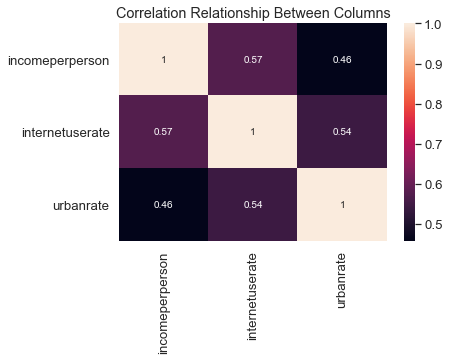

In [29]:
sb.heatmap(df.corr(), annot = True)
plt.title("Correlation Relationship Between Columns")

Text(0, 0.5, '')

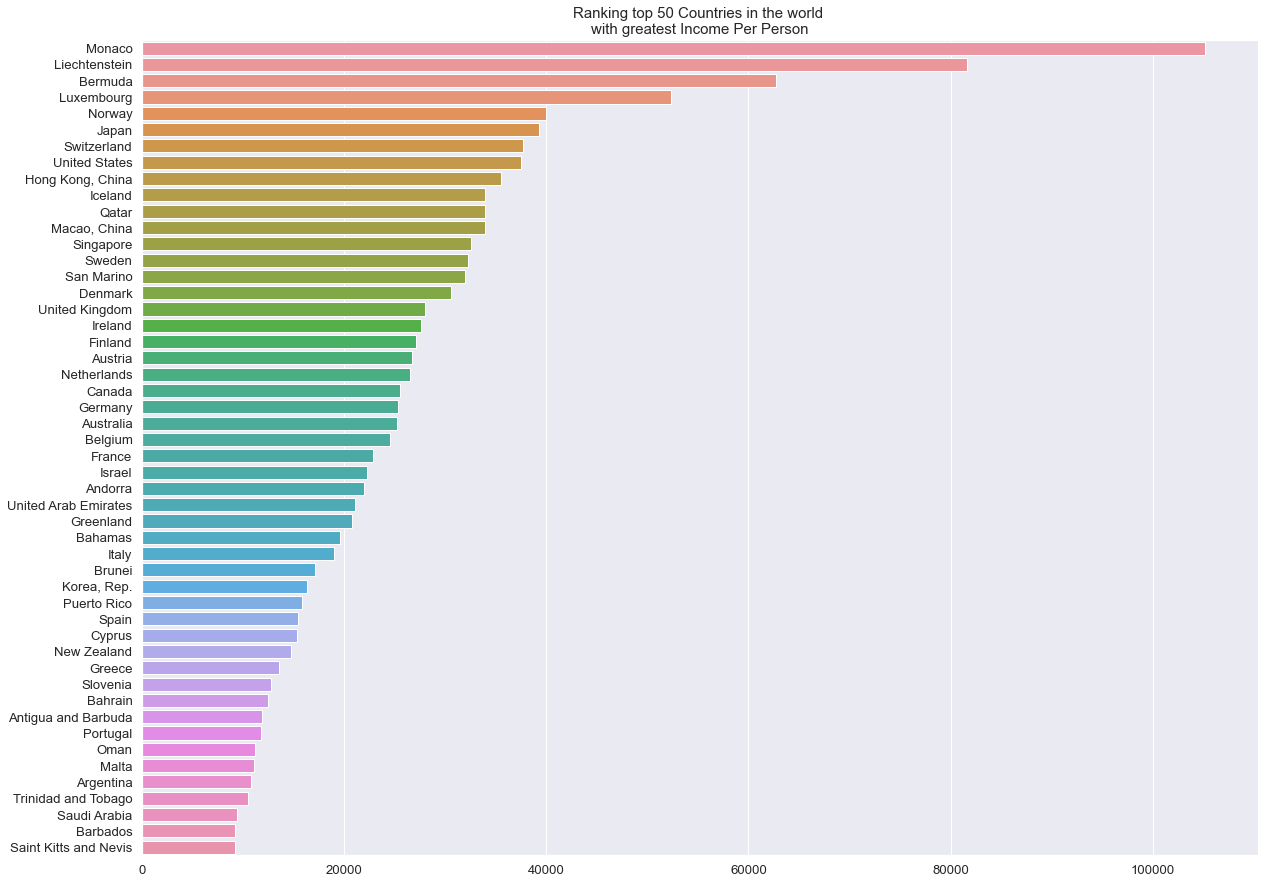

In [86]:
plt.figure(figsize = (20, 15))
country = df.groupby("country").agg("sum").sort_values(by = "incomeperperson", ascending = False).head(50)
sb.barplot(x = country["incomeperperson"].values, y = country["incomeperperson"].index, data = country)
plt.title("Ranking top 50 Countries in the world \nwith greatest Income Per Person", fontsize = (15))
plt.ylabel(None)

Text(0, 0.5, '')

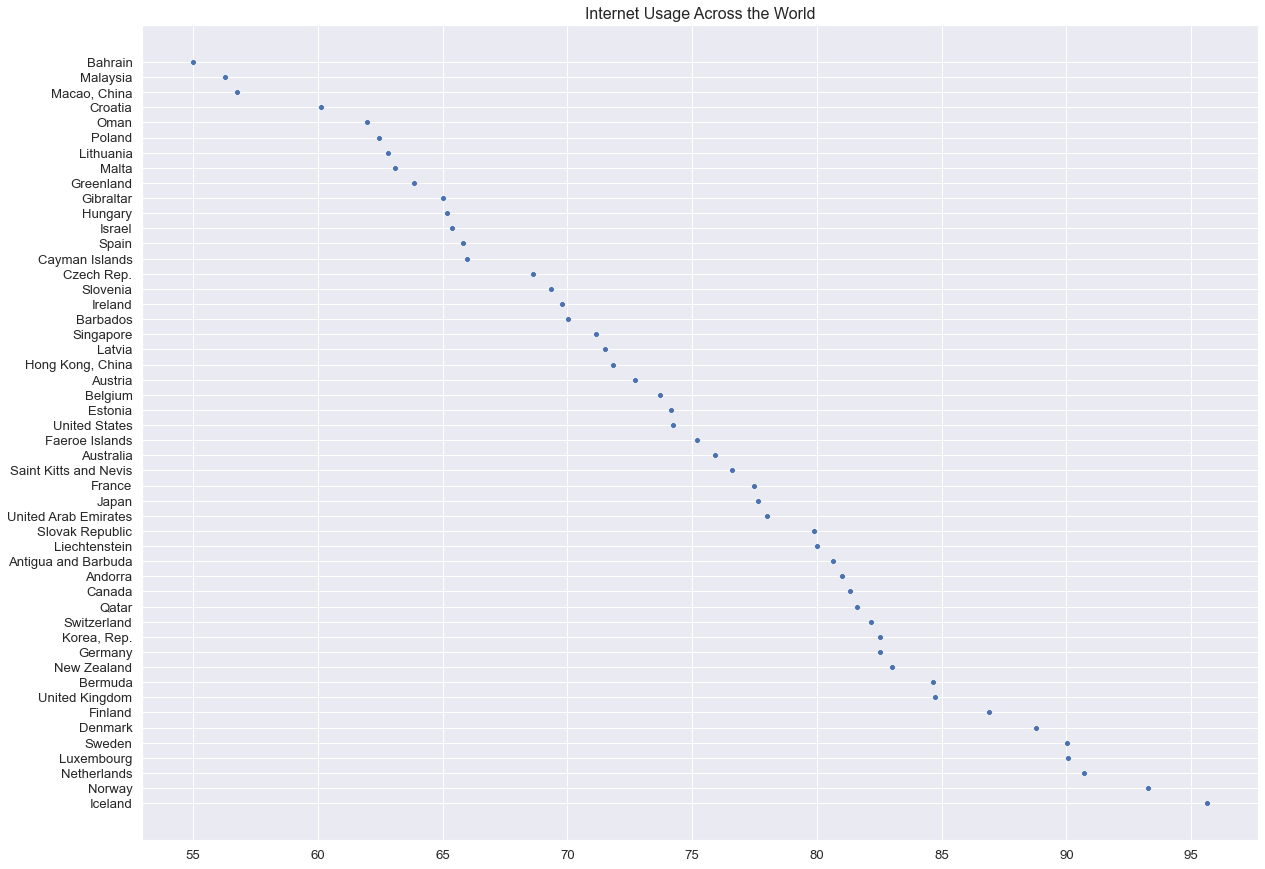

In [102]:
plt.figure(figsize = (20, 15))
country = df.groupby("country").agg("sum").sort_values(by = "internetuserate", ascending = False).head(50)
sb.scatterplot(x = country["internetuserate"].values, y = country["internetuserate"].index, data = country)
plt.title("Internet Usage Across the World", fontsize = (16))
plt.ylabel("")

Text(0, 0.5, '')

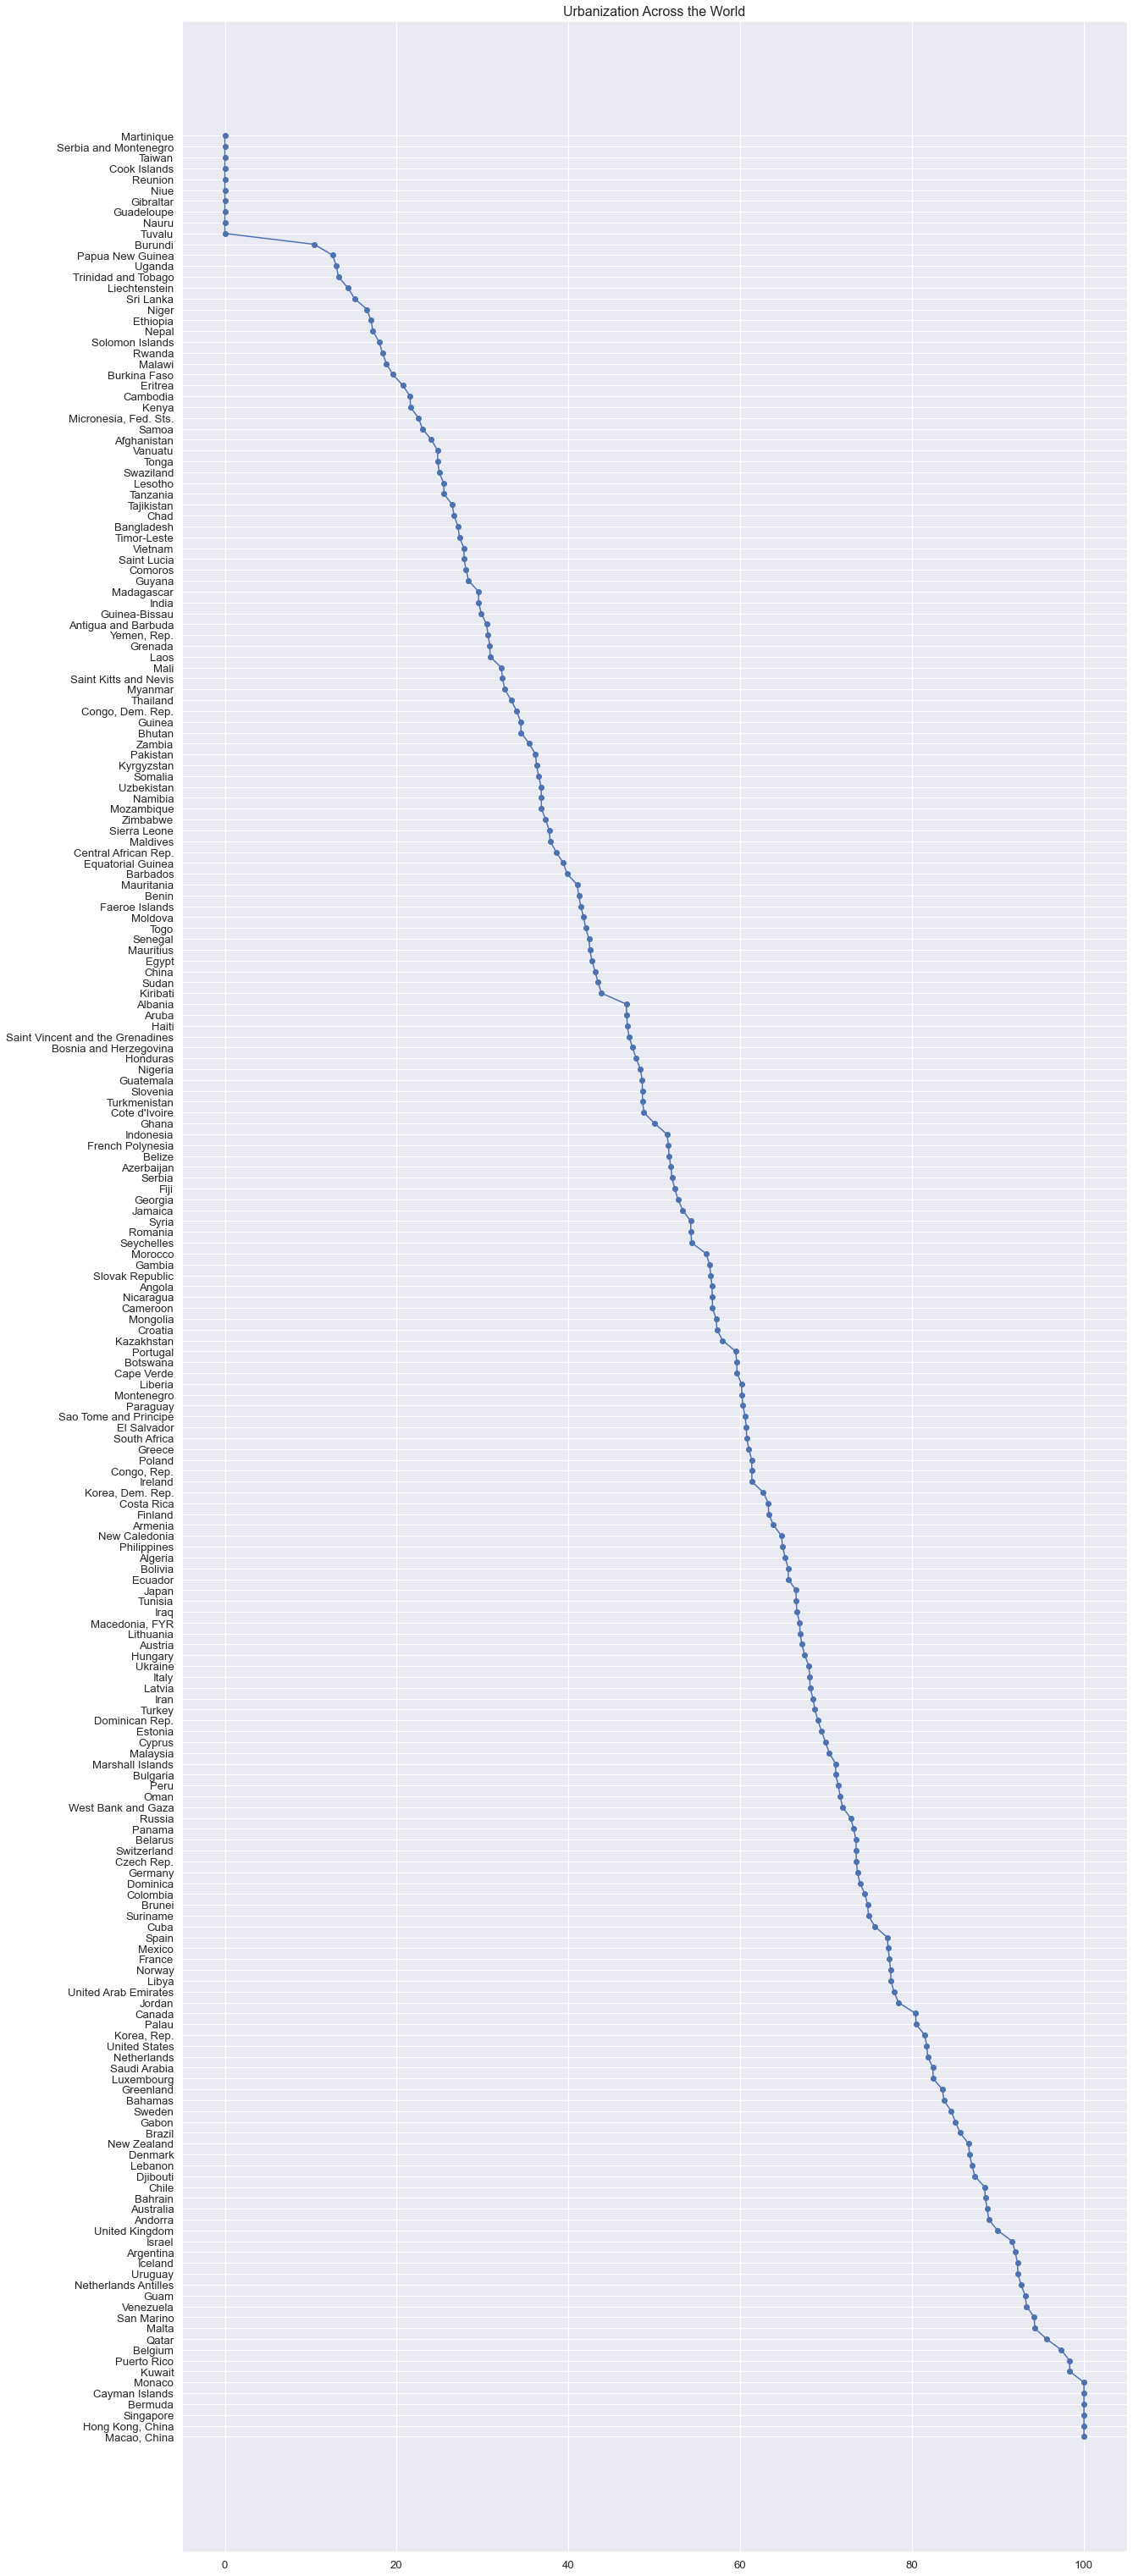

In [140]:
plt.figure(figsize = (20, 55))
country = df.groupby("country").agg("sum").sort_values(by = "urbanrate", ascending = False).head(1500)
#sb.scatterplot(x = country["urbanrate"].values, y = country["urbanrate"].index, data = country)
plt.plot(country["urbanrate"].values, country["urbanrate"].index, marker = "o")
plt.title("Urbanization Across the World", fontsize = (16))
plt.ylabel("")